In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [2]:
reviews = pd.read_csv('turtle_reviews.csv')

reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [5]:
new_reviews = reviews.copy()

new_reviews.drop(['language', 'platform'], axis=1)

new_reviews.rename(columns = {'remuneration (k£)':'salary_000k', 'spending_score (1-100)':'score'})

,gender,age,salary_000k,score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [6]:
new_reviews.to_csv('new_turtle_reviews.csv')

In [7]:
turtle_csv = pd.read_csv('new_turtle_reviews.csv')
print(turtle_csv.shape)
turtle_csv.head()


(2000, 12)


,Unnamed: 0,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


Text(0, 0.5, 'loyalty points')

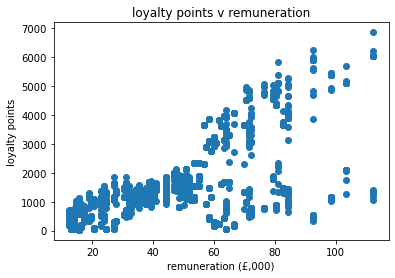

In [8]:
y = turtle_csv['loyalty_points'].values.reshape(-1,1)
x = turtle_csv['remuneration (k£)'].values.reshape(-1,1)

plt.clf()
plt.scatter(x,y)
plt.title('loyalty points v remuneration')

plt.xlabel('remuneration (£,000)')
plt.ylabel('loyalty points')

In [9]:
f = 'y ~ x'
test = ols(f,data = turtle_csv).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 22 Aug 2022   Prob (F-statistic):          2.43e-209
Time:                        18:08:30   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print("Parameters:", test.params)

print("Standard Errors: ", test.bse)

print("Predicted values: ", test.predict())

Parameters: Intercept   -65.686513
x            34.187825
dtype: float64
Standard Errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [11]:
y_pred = 34.1878 * x - 65.6865

y_pred

array([[ 354.82344 ],
       [ 354.82344 ],
       [ 382.857436],
       ...,
       [3102.155048],
       [3298.39302 ],
       [3102.155048]])

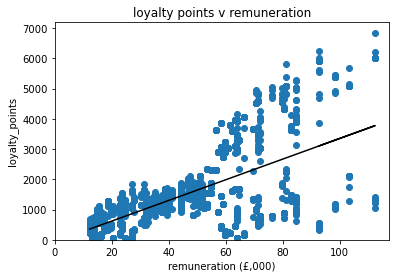

In [12]:
import matplotlib.pyplot as plt

plt.clf()
# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)

plt.title('loyalty points v remuneration')

plt.xlabel('remuneration (£,000)')
plt.ylabel('loyalty_points')
plt.show()

Text(0, 0.5, 'loyalty points')

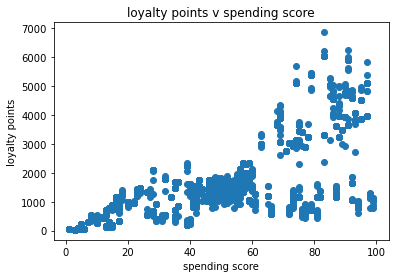

In [13]:
y = turtle_csv['loyalty_points'].values.reshape(-1,1)
x = turtle_csv['spending_score (1-100)'].values.reshape(-1,1)

plt.clf()
plt.scatter(x,y)

plt.title('loyalty points v spending score')

plt.xlabel('spending score')
plt.ylabel('loyalty points')

In [14]:
f = 'y ~ x'
test = ols(f,data = turtle_csv).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 22 Aug 2022   Prob (F-statistic):          2.92e-263
Time:                        18:08:38   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
print("Parameters:", test.params)

print("Standard Errors: ", test.bse)

print("Predicted values: ", test.predict())

Parameters: Intercept   -75.052663
x            33.061693
dtype: float64
Standard Errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [16]:
y_pred = 33.0617 * x - 75.0527

y_pred

array([[1214.3536],
       [2602.945 ],
       [ 123.3175],
       ...,
       [2933.562 ],
       [ 453.9345],
       [ 189.4409]])

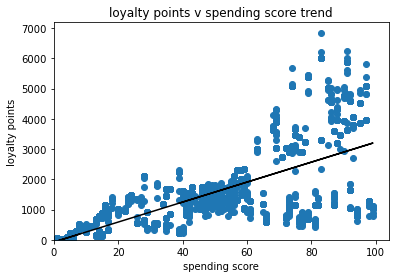

In [17]:
import matplotlib.pyplot as plt

plt.clf()
# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)

plt.title('loyalty points v spending score trend')

plt.xlabel('spending score')
plt.ylabel('loyalty points')
plt.show()

Text(0, 0.5, 'loyalty points')

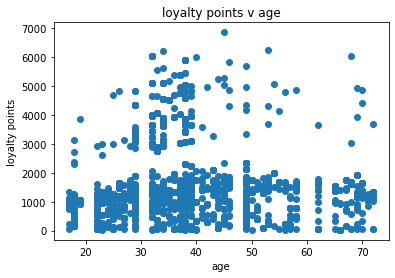

In [18]:
y = turtle_csv['loyalty_points'].values.reshape(-1,1)
x = turtle_csv['age'].values.reshape(-1,1)

plt.scatter(x,y)

plt.title('loyalty points v age')
plt.xlabel('age')
plt.ylabel('loyalty points')

In [19]:
f = 'y ~ x'
test = ols(f,data = turtle_csv).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 22 Aug 2022   Prob (F-statistic):             0.0577
Time:                        18:08:38   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
print("Parameters:", test.params)

print("Standard Errors: ", test.bse)

print("Predicted values: ", test.predict())

Parameters: Intercept    1736.517739
x              -4.012805
dtype: float64
Standard Errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [21]:
y_pred = -4.0128 * x + 1736.5177

y_pred

array([[1664.2873],
       [1644.2233],
       [1648.2361],
       ...,
       [1600.0825],
       [1600.0825],
       [1608.1081]])

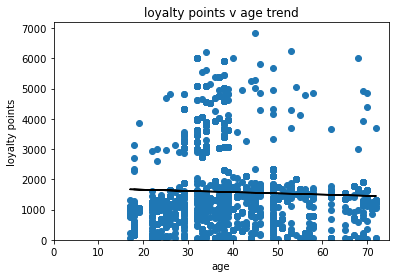

In [22]:
import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)

plt.title('loyalty points v age trend')

plt.xlabel('age')
plt.ylabel('loyalty points')

plt.show()

Part 2

In [23]:
df2 = turtle_csv[['remuneration (k£)', 'spending_score (1-100)']]

In [24]:
print(df2.info())
df2.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   remuneration (k£)       2000 non-null   float64
 1   spending_score (1-100)  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


,remuneration (k£),spending_score (1-100)
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


Text(0, 0.5, 'remuneration')

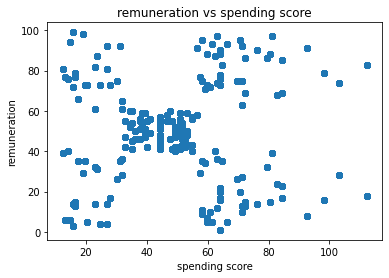

In [25]:
plt.scatter(x='remuneration (k£)', y = 'spending_score (1-100)', data = df2)

plt.title('remuneration vs spending score')
plt.xlabel('spending score')
plt.ylabel('remuneration')

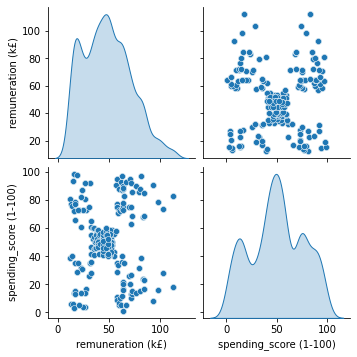

In [26]:
import seaborn as sns

sns.pairplot(df2, diag_kind = 'kde')

Text(0, 0.5, 'Remuneration')

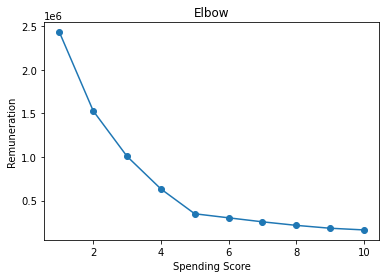

In [27]:
from sklearn.cluster import KMeans

cs = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df2)
    cs.append(kmeans.inertia_)

plt.plot(range(1,11), cs, marker='o')
plt.title('Elbow')
plt.xlabel("Spending Score")
plt.ylabel("Remuneration")

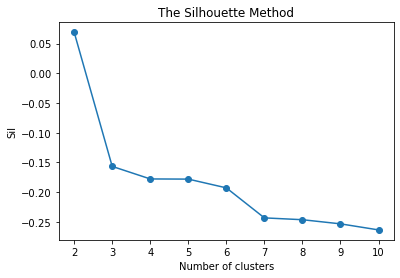

In [28]:
from sklearn.metrics import silhouette_score

sil = []
kmax=10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

plt.plot(range(2,kmax+1), sil, marker = 'o')
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")
plt.show()
    

/var/folders/09/kz04x5d51z70xmbz_t202qlc0000gn/T/ipykernel_27865/1146289642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['K-Means Predicted'] = clusters


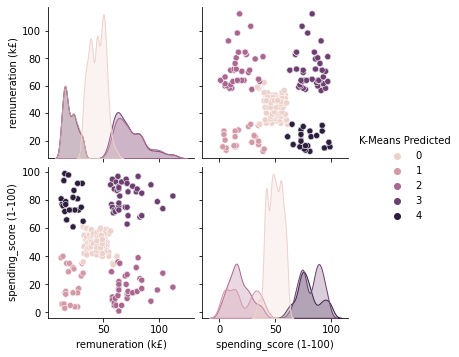

In [29]:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(df2)
clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2, hue='K-Means Predicted', diag_kind= 'kde')


In [30]:
df2['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

/var/folders/09/kz04x5d51z70xmbz_t202qlc0000gn/T/ipykernel_27865/3390126192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['K-Means Predicted'] = clusters


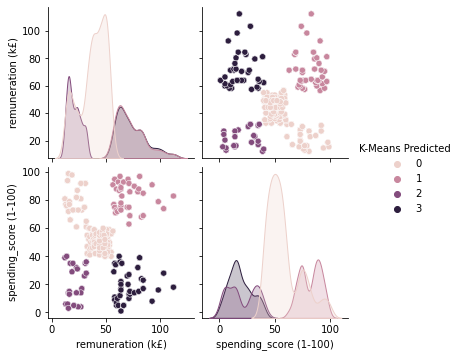

In [31]:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(df2)
clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2, hue='K-Means Predicted', diag_kind= 'kde')

In [32]:
df2['K-Means Predicted'].value_counts()

0    1013
1     356
3     351
2     280
Name: K-Means Predicted, dtype: int64

/var/folders/09/kz04x5d51z70xmbz_t202qlc0000gn/T/ipykernel_27865/4253773275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['K-Means Predicted'] = clusters


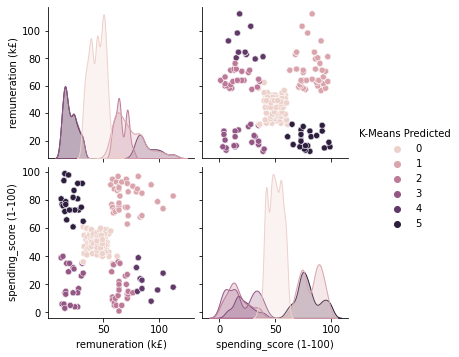

In [33]:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(df2)
clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2, hue='K-Means Predicted', diag_kind= 'kde')

In [34]:
df2['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [35]:
print(df2.head())

   remuneration (k£)  spending_score (1-100)  K-Means Predicted
0              12.30                      39                  3
1              12.30                      81                  5
2              13.12                       6                  3
3              13.12                      77                  5
4              13.94                      40                  3


<AxesSubplot:xlabel='remuneration (k£)', ylabel='spending_score (1-100)'>

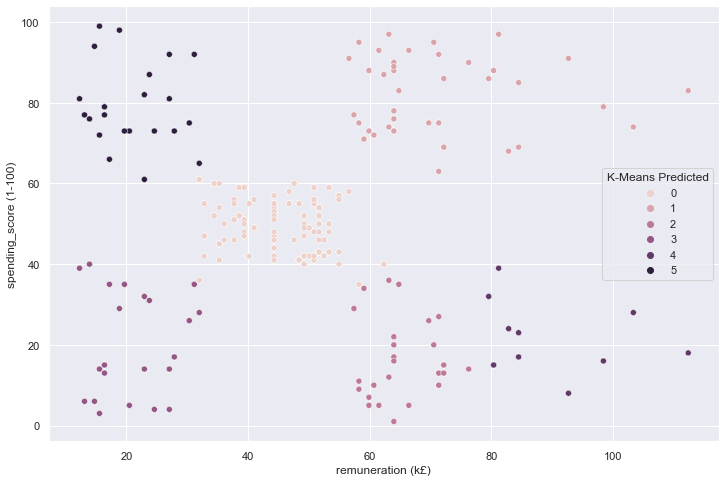

In [36]:
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration (k£)' , 
                y ='spending_score (1-100)',
                data=df2 , hue='K-Means Predicted')

In [39]:
# create new turtle review table with only Review and Summary columns
new_turtle = turtle_csv[['review', 'summary']]

In [40]:
# view the table
new_turtle.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [42]:
# Check the new table for null values
new_turtle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [45]:
new_turtle['review']= new_turtle['review'].str.lower()

new_turtle['summary'] = new_turtle['summary'].str.lower()


/var/folders/09/kz04x5d51z70xmbz_t202qlc0000gn/T/ipykernel_27865/2190905531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_turtle['review']= new_turtle['review'].str.lower()
/var/folders/09/kz04x5d51z70xmbz_t202qlc0000gn/T/ipykernel_27865/2190905531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_turtle['summary'] = new_turtle['summary'].str.lower()


In [46]:
new_turtle.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
